# EBM 1D latitudinal (climlab)

Notebook en construcción.

In [ ]:
# EBM 1D latitudinal (climlab)

Modelo de balance de energía latitudinal con ciclo estacional.

Este notebook permite ejecutar un EBM 1D, explorar su estado estacionario estacional
y analizar perfiles latitudinales y ciclos estacionales de temperatura superficial.

**Instrucciones:**
1. Ejecutar todas las celdas en orden.
2. Modificar solo los parámetros indicados cuando se solicite.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import climlab
import warnings

# Silence harmless numerical warnings
warnings.filterwarnings("ignore", message="invalid value encountered in arccos")
warnings.filterwarnings("ignore", message="Cannot import and initialize compiled Fortran extension*")
warnings.filterwarnings("ignore", message="Cannot import EmanuelConvection*")
warnings.filterwarnings("ignore", message="Cannot import SimplifiedBettsMiller*")

print("numpy:", np.__version__)
print("climlab:", climlab.__version__)

numpy: 2.2.6
climlab: 0.9.1


In [3]:
# ==========================
# Parameters (editable)
# ==========================

nyears = 10   # spin-up years (keep small for Binder stability)


In [4]:
# Build seasonal EBM
m = climlab.EBM_seasonal()

# Integrate to reach a stationary seasonal regime
m.integrate_years(nyears)

print("Spin-up completed.")


Integrating for 900 steps, 3652.4220000000005 days, or 10 years.
Total elapsed time is 9.999999999999863 years.
Spin-up completed.


In [5]:
print("State variables:", list(m.state.keys()))
print("Diagnostics:", list(m.diagnostics.keys())[:10], "...")
print("Subprocesses:", list(m.subprocess.keys()))


State variables: ['Ts']
Diagnostics: ['OLR', 'insolation', 'coszen', 'irradiance_factor', 'icelat', 'ice_area', 'albedo', 'ASR', 'diffusive_flux', 'advective_flux'] ...
Subprocesses: ['LW', 'insolation', 'albedo', 'SW', 'diffusion']


In [6]:
# Latitude coordinate
lat = m.state['Ts'].domain.axes['lat'].points

# Time step (seconds -> days)
dt_days = m.timestep / 86400.0
nsteps_year = int(round(365.0 / dt_days))

print(f"Time step: {dt_days:.2f} days")
print(f"Steps per year: {nsteps_year}")

# Store one full seasonal cycle after spin-up
Ts_year = np.zeros((len(lat), nsteps_year))

for k in range(nsteps_year):
    m.step_forward()
    Ts_year[:, k] = np.array(m.state['Ts']).ravel()

# Annual mean temperature profile
Ts_ann = Ts_year.mean(axis=1)

# Time axis for plotting
time_days = np.arange(nsteps_year) * dt_days


Time step: 4.06 days
Steps per year: 90


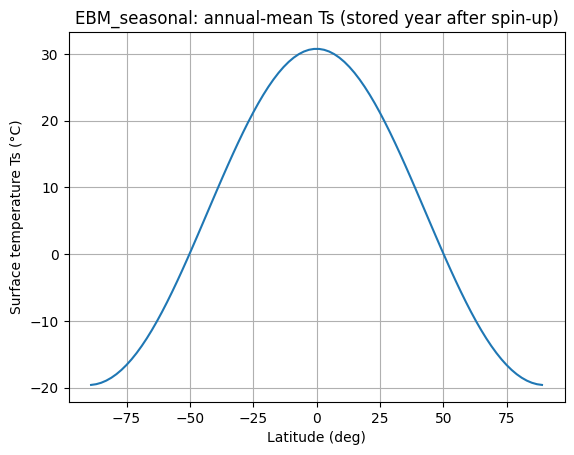

In [7]:
plt.figure()
plt.plot(lat, Ts_ann)
plt.xlabel("Latitude (deg)")
plt.ylabel("Surface temperature Ts (°C)")
plt.title("EBM_seasonal: annual-mean Ts (stored year after spin-up)")
plt.grid(True)
plt.show()


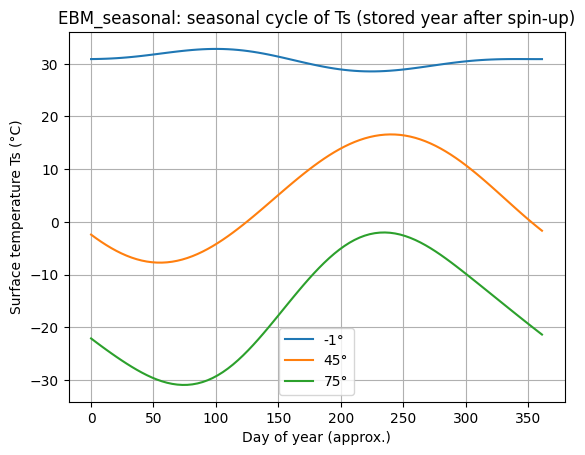

In [8]:
target_lats = [0, 45, 75]
idx = [int(np.argmin(np.abs(lat - x))) for x in target_lats]

plt.figure()
for x, i in zip(target_lats, idx):
    plt.plot(time_days, Ts_year[i, :], label=f"{lat[i]:.0f}°")

plt.xlabel("Day of year (approx.)")
plt.ylabel("Surface temperature Ts (°C)")
plt.title("EBM_seasonal: seasonal cycle of Ts (stored year after spin-up)")
plt.legend()
plt.grid(True)
plt.show()
